Loading CSV

In [ ]:
import pandas as pd
# Load the CSV file into a pandas DataFrame
df = pd.read_csv('Kp_English_final.csv')

In [ ]:
df

,video_id,author,published_at,like_count,text,time_period,script
0,Wya7Tew8fXA,@sayakdas7264,2022-11-05 10:19:23,2.0,India has never claimed territories that don&#...,before_election,English
1,F_A0CW1kSJE,@nepaliyouthmotivationspeech,2022-11-02 09:00:01,3.0,God job sir...u can motivate all nepali to vot...,before_election,English
2,AQt_hQ--XwU,@adhikarinabin507,2022-11-22 14:12:31,0.0,Yestyo thokthake english le des bikas hudaiana...,before_election,English
3,55oY6NA8DSY,@salimwongjeng8098,2022-09-16 01:27:55,0.0,Comedy KP Oli Sharma show,before_election,English
4,x90ZXr6DD-c,@bibekmagar5534,2022-10-30 17:25:06,0.0,"make video on <a href=""http://www.youtube.com/...",before_election,English
...,...,...,...,...,...,...,...
1340,75X0Fl4_ujI,@Fcmab1,2024-03-24 18:29:02,0.0,Me nepali hu lekin praticalally india right he...,after_election,English
1341,5A7KJoA6amw,@Bot-cx4ei,2024-10-08 06:28:45,0.0,❤🎉 Keep going IDS ... youths are with you..,after_election,English
1342,x6LSxqqkdDY,@sumanjungchhetri1356,2024-10-24 16:32:25,54.0,K. P Sharma Oli aka kp oli is the worst politi...,after_election,English
1343,4CouLyXOGns,@AntimKc-b2c,2024-08-25 21:08:19,0.0,8 class 😊😊,after_election,English


PREPROCESSING USING NLP

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download required NLTK data (if not already downloaded)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

def preprocess_text(text):
    # 1. Lowercase the text
    text = text.lower()

    # 2. Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # 3. Tokenize the text
    tokens = text.split()

    # 4. Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # 5. Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # 6. Join the tokens back into a string
    processed_text = ' '.join(tokens)

    return processed_text

# Apply the preprocessing function to the 'text' column
df['processed_text'] = df['text'].apply(preprocess_text)


In [ ]:
df

,video_id,author,published_at,like_count,text,time_period,script,processed_text
0,Wya7Tew8fXA,@sayakdas7264,2022-11-05 10:19:23,2.0,India has never claimed territories that don&#...,before_election,English,india never claimed territory dont belong u so...
1,F_A0CW1kSJE,@nepaliyouthmotivationspeech,2022-11-02 09:00:01,3.0,God job sir...u can motivate all nepali to vot...,before_election,English,god job siru motivate nepali vote right candidate
2,AQt_hQ--XwU,@adhikarinabin507,2022-11-22 14:12:31,0.0,Yestyo thokthake english le des bikas hudaiana...,before_election,English,yestyo thokthake english le de bikas hudaiana
3,55oY6NA8DSY,@salimwongjeng8098,2022-09-16 01:27:55,0.0,Comedy KP Oli Sharma show,before_election,English,comedy kp oli sharma show
4,x90ZXr6DD-c,@bibekmagar5534,2022-10-30 17:25:06,0.0,"make video on <a href=""http://www.youtube.com/...",before_election,English,make video hrefhttpwwwyoutubecomresultssearchq...
...,...,...,...,...,...,...,...,...
1340,75X0Fl4_ujI,@Fcmab1,2024-03-24 18:29:02,0.0,Me nepali hu lekin praticalally india right he...,after_election,English,nepali hu lekin praticalally india right legal...
1341,5A7KJoA6amw,@Bot-cx4ei,2024-10-08 06:28:45,0.0,❤🎉 Keep going IDS ... youths are with you..,after_election,English,keep going id youth
1342,x6LSxqqkdDY,@sumanjungchhetri1356,2024-10-24 16:32:25,54.0,K. P Sharma Oli aka kp oli is the worst politi...,after_election,English,k p sharma oli aka kp oli worst politician man...
1343,4CouLyXOGns,@AntimKc-b2c,2024-08-25 21:08:19,0.0,8 class 😊😊,after_election,English,class


CREATE SEPARATE DATAFRAME FOR BEFORE AND AFTER ELECTION

In [ ]:
# Create two separate dataframes based on the 'time_period' column
before_election_df = df[df['time_period'] == 'before_election']
after_election_df = df[df['time_period'] == 'after_election']

In [ ]:
before_election_df

,video_id,author,published_at,like_count,text,time_period,script,processed_text
0,Wya7Tew8fXA,@sayakdas7264,2022-11-05 10:19:23,2.0,India has never claimed territories that don&#...,before_election,English,india never claimed territory dont belong u so...
1,F_A0CW1kSJE,@nepaliyouthmotivationspeech,2022-11-02 09:00:01,3.0,God job sir...u can motivate all nepali to vot...,before_election,English,god job siru motivate nepali vote right candidate
2,AQt_hQ--XwU,@adhikarinabin507,2022-11-22 14:12:31,0.0,Yestyo thokthake english le des bikas hudaiana...,before_election,English,yestyo thokthake english le de bikas hudaiana
3,55oY6NA8DSY,@salimwongjeng8098,2022-09-16 01:27:55,0.0,Comedy KP Oli Sharma show,before_election,English,comedy kp oli sharma show
4,x90ZXr6DD-c,@bibekmagar5534,2022-10-30 17:25:06,0.0,"make video on <a href=""http://www.youtube.com/...",before_election,English,make video hrefhttpwwwyoutubecomresultssearchq...
...,...,...,...,...,...,...,...,...
1018,F_A0CW1kSJE,@emulator4621,2022-10-22 08:35:35,2.0,To be honest I don&#39;t see any stronger pers...,before_election,English,honest dont see stronger personality mr comedi...
1019,F_A0CW1kSJE,@Relaxationmuzic,2022-10-22 22:08:48,2.0,"Great content, hope u will cover prachanda and...",before_election,English,great content hope u cover prachanda sherey
1020,Wya7Tew8fXA,@ss304_82,2022-11-05 14:11:24,0.0,India doesn&#39;t care. We are already 5th lar...,before_election,English,india doesnt care already th largest economy c...
1021,Wya7Tew8fXA,@AvhisshThakuri,2022-11-05 12:58:23,1.0,India is very big and either it is back on our...,before_election,English,india big either back territory nepal kalapani...


In [ ]:
after_election_df

,video_id,author,published_at,like_count,text,time_period,script,processed_text
1023,9plD_OoX1Hc,@__Dallu456,2024-09-25 03:30:00,3.0,Bless everyone god 💸🌈💰,after_election,English,bless everyone god
1024,sIsSokS6f8c,@sunilgoudel,2024-11-12 17:30:42,0.0,Yo information kaha bata aucha great😮,after_election,English,yo information kaha bata aucha great
1025,Mv8Orvg_kyY,@dilbogati2762,2024-10-23 14:10:55,1.0,Rip,after_election,English,rip
1026,Gqc7dWg1rwU,@biplove6110,2024-07-21 16:13:45,0.0,yesta chor khatey,after_election,English,yesta chor khatey
1027,_eDeVZ3T2Rs,@ganeshbhandari3060,2024-10-13 15:02:55,0.0,Respected Balen ko jaya hoss. ❤,after_election,English,respected balen ko jaya hoss
...,...,...,...,...,...,...,...,...
1340,75X0Fl4_ujI,@Fcmab1,2024-03-24 18:29:02,0.0,Me nepali hu lekin praticalally india right he...,after_election,English,nepali hu lekin praticalally india right legal...
1341,5A7KJoA6amw,@Bot-cx4ei,2024-10-08 06:28:45,0.0,❤🎉 Keep going IDS ... youths are with you..,after_election,English,keep going id youth
1342,x6LSxqqkdDY,@sumanjungchhetri1356,2024-10-24 16:32:25,54.0,K. P Sharma Oli aka kp oli is the worst politi...,after_election,English,k p sharma oli aka kp oli worst politician man...
1343,4CouLyXOGns,@AntimKc-b2c,2024-08-25 21:08:19,0.0,8 class 😊😊,after_election,English,class


DROPPING UNUSEFUL FEATURES

In [ ]:
# Drop the specified columns from the dataframe
before_election_df = before_election_df.drop(columns=['video_id', 'text', 'time_period', 'script'])
after_election_df = after_election_df.drop(columns=['video_id', 'text', 'time_period', 'script'])
# Display the updated dataframe (optional)
# print(before_election_df.head())


In [ ]:
before_election_df

,author,published_at,like_count,processed_text
0,@sayakdas7264,2022-11-05 10:19:23,2.0,india never claimed territory dont belong u so...
1,@nepaliyouthmotivationspeech,2022-11-02 09:00:01,3.0,god job siru motivate nepali vote right candidate
2,@adhikarinabin507,2022-11-22 14:12:31,0.0,yestyo thokthake english le de bikas hudaiana
3,@salimwongjeng8098,2022-09-16 01:27:55,0.0,comedy kp oli sharma show
4,@bibekmagar5534,2022-10-30 17:25:06,0.0,make video hrefhttpwwwyoutubecomresultssearchq...
...,...,...,...,...
1018,@emulator4621,2022-10-22 08:35:35,2.0,honest dont see stronger personality mr comedi...
1019,@Relaxationmuzic,2022-10-22 22:08:48,2.0,great content hope u cover prachanda sherey
1020,@ss304_82,2022-11-05 14:11:24,0.0,india doesnt care already th largest economy c...
1021,@AvhisshThakuri,2022-11-05 12:58:23,1.0,india big either back territory nepal kalapani...


In [ ]:
after_election_df

,author,published_at,like_count,processed_text
1023,@__Dallu456,2024-09-25 03:30:00,3.0,bless everyone god
1024,@sunilgoudel,2024-11-12 17:30:42,0.0,yo information kaha bata aucha great
1025,@dilbogati2762,2024-10-23 14:10:55,1.0,rip
1026,@biplove6110,2024-07-21 16:13:45,0.0,yesta chor khatey
1027,@ganeshbhandari3060,2024-10-13 15:02:55,0.0,respected balen ko jaya hoss
...,...,...,...,...
1340,@Fcmab1,2024-03-24 18:29:02,0.0,nepali hu lekin praticalally india right legal...
1341,@Bot-cx4ei,2024-10-08 06:28:45,0.0,keep going id youth
1342,@sumanjungchhetri1356,2024-10-24 16:32:25,54.0,k p sharma oli aka kp oli worst politician man...
1343,@AntimKc-b2c,2024-08-25 21:08:19,0.0,class


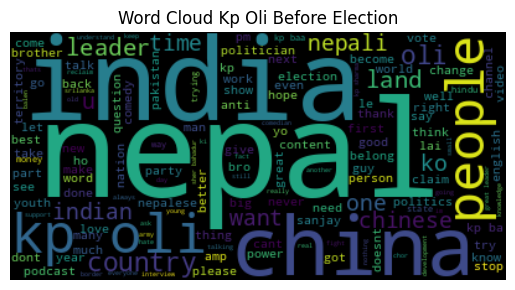

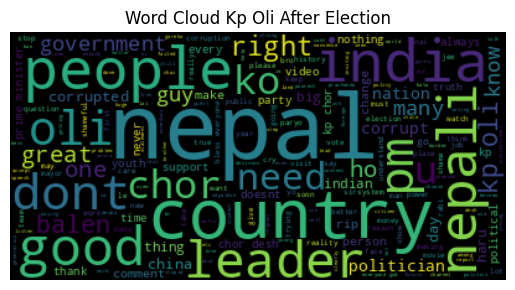

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all processed texts before the election
text_before = " ".join(before_election_df['processed_text'].astype(str))

# Combine all processed texts after the election
text_after = " ".join(after_election_df['processed_text'].astype(str))


# Create and generate a word cloud image:
wordcloud_before = WordCloud().generate(text_before)

# Display the generated image:
plt.imshow(wordcloud_before, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud Kp Oli Before Election")
plt.show()


# Create and generate a word cloud image:
wordcloud_after = WordCloud().generate(text_after)

# Display the generated image:
plt.imshow(wordcloud_after, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud Kp Oli After Election")
plt.show()

distilbert-base-uncased-finetuned-sst-2-english model for sentiment analysis

In [ ]:
# https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english

from transformers import pipeline

# Load the sentiment analysis pipeline
classifier = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Function to apply sentiment analysis to a text
def analyze_sentiment(text):
    try:
        result = classifier(text)[0]
        return result['label'], result['score']
    except Exception as e:
        print(f"Error analyzing sentiment for text: {text}. Error: {e}")
        return "ERROR", 0.0  # Return a default value in case of an error

# Apply sentiment analysis to the 'processed_text' column
before_election_df[['sentiment_label', 'sentiment_score']] = before_election_df['processed_text'].apply(lambda x: pd.Series(analyze_sentiment(x)))
after_election_df[['sentiment_label', 'sentiment_score']] = after_election_df['processed_text'].apply(lambda x: pd.Series(analyze_sentiment(x)))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
before_election_df

,author,published_at,like_count,processed_text,sentiment_label,sentiment_score
0,@sayakdas7264,2022-11-05 10:19:23,2.0,india never claimed territory dont belong u so...,NEGATIVE,0.995668
1,@nepaliyouthmotivationspeech,2022-11-02 09:00:01,3.0,god job siru motivate nepali vote right candidate,POSITIVE,0.934174
2,@adhikarinabin507,2022-11-22 14:12:31,0.0,yestyo thokthake english le de bikas hudaiana,NEGATIVE,0.942834
3,@salimwongjeng8098,2022-09-16 01:27:55,0.0,comedy kp oli sharma show,POSITIVE,0.977954
4,@bibekmagar5534,2022-10-30 17:25:06,0.0,make video hrefhttpwwwyoutubecomresultssearchq...,NEGATIVE,0.986314
...,...,...,...,...,...,...
1018,@emulator4621,2022-10-22 08:35:35,2.0,honest dont see stronger personality mr comedi...,POSITIVE,0.854469
1019,@Relaxationmuzic,2022-10-22 22:08:48,2.0,great content hope u cover prachanda sherey,POSITIVE,0.999483
1020,@ss304_82,2022-11-05 14:11:24,0.0,india doesnt care already th largest economy c...,NEGATIVE,0.996694
1021,@AvhisshThakuri,2022-11-05 12:58:23,1.0,india big either back territory nepal kalapani...,NEGATIVE,0.977427


In [ ]:
after_election_df

,author,published_at,like_count,processed_text,sentiment_label,sentiment_score
1023,@__Dallu456,2024-09-25 03:30:00,3.0,bless everyone god,POSITIVE,0.999270
1024,@sunilgoudel,2024-11-12 17:30:42,0.0,yo information kaha bata aucha great,POSITIVE,0.988922
1025,@dilbogati2762,2024-10-23 14:10:55,1.0,rip,NEGATIVE,0.990363
1026,@biplove6110,2024-07-21 16:13:45,0.0,yesta chor khatey,POSITIVE,0.991085
1027,@ganeshbhandari3060,2024-10-13 15:02:55,0.0,respected balen ko jaya hoss,POSITIVE,0.998754
...,...,...,...,...,...,...
1340,@Fcmab1,2024-03-24 18:29:02,0.0,nepali hu lekin praticalally india right legal...,NEGATIVE,0.916755
1341,@Bot-cx4ei,2024-10-08 06:28:45,0.0,keep going id youth,POSITIVE,0.985575
1342,@sumanjungchhetri1356,2024-10-24 16:32:25,54.0,k p sharma oli aka kp oli worst politician man...,NEGATIVE,0.991494
1343,@AntimKc-b2c,2024-08-25 21:08:19,0.0,class,POSITIVE,0.996823


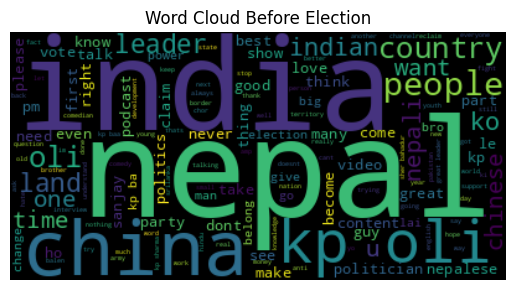

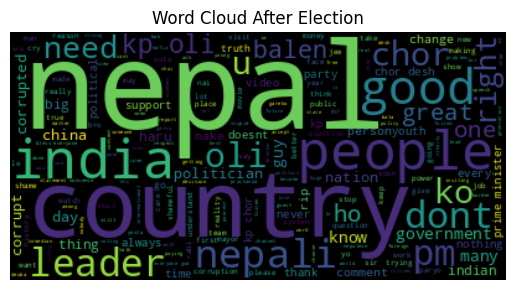

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all processed texts before the election
text_before = " ".join(before_election_df['processed_text'].astype(str))

# Combine all processed texts after the election
text_after = " ".join(after_election_df['processed_text'].astype(str))


# Create and generate a word cloud image:
wordcloud_before = WordCloud().generate(text_before)

# Display the generated image:
plt.imshow(wordcloud_before, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud Before Election")
plt.show()


# Create and generate a word cloud image:
wordcloud_after = WordCloud().generate(text_after)

# Display the generated image:
plt.imshow(wordcloud_after, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud After Election")
plt.show()

emotion-english-distilroberta-base model for emotion detection

In [ ]:
#  https://huggingface.co/j-hartmann/emotion-english-distilroberta-base

from transformers import pipeline

# Load the emotion detection model
classifier = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base")

# Function to detect emotions in a text
def detect_emotion(text):
    try:
        result = classifier(text)
        return result[0]['label']  # Return the predicted emotion label
    except Exception as e:
        print(f"Error processing text: {e}")
        return None

# Apply the emotion detection model to the 'processed_text' column
before_election_df['detected_emotion'] = before_election_df['processed_text'].apply(detect_emotion)
after_election_df['detected_emotion'] = after_election_df['processed_text'].apply(detect_emotion)

Device set to use cpu


In [ ]:
before_election_df

,author,published_at,like_count,processed_text,sentiment_label,sentiment_score,detected_emotion
0,@sayakdas7264,2022-11-05 10:19:23,2.0,india never claimed territory dont belong u so...,NEGATIVE,0.995668,neutral
1,@nepaliyouthmotivationspeech,2022-11-02 09:00:01,3.0,god job siru motivate nepali vote right candidate,POSITIVE,0.934174,surprise
2,@salimwongjeng8098,2022-09-16 01:27:55,0.0,comedy kp oli sharma show,POSITIVE,0.977954,joy
3,@bibekmagar5534,2022-10-30 17:25:06,0.0,make video hrefhttpwwwyoutubecomresultssearchq...,NEGATIVE,0.986314,neutral
4,@dipc747,2022-11-05 09:32:08,8.0,trying become xixinping nepal,NEGATIVE,0.947853,neutral
...,...,...,...,...,...,...,...
1015,@emulator4621,2022-10-22 08:35:35,2.0,honest dont see stronger personality mr comedi...,POSITIVE,0.854469,joy
1016,@Relaxationmuzic,2022-10-22 22:08:48,2.0,great content hope u cover prachanda sherey,POSITIVE,0.999483,joy
1017,@ss304_82,2022-11-05 14:11:24,0.0,india doesnt care already th largest economy c...,NEGATIVE,0.996694,surprise
1018,@AvhisshThakuri,2022-11-05 12:58:23,1.0,india big either back territory nepal kalapani...,NEGATIVE,0.977427,neutral


In [ ]:
# Save the dataframe to a CSV file. Replace 'before_election_df.csv' with your desired filename.
before_election_df.to_csv('before_election_df.csv', index=False)
# The index=False argument prevents the dataframe index from being saved to the file.


In [ ]:
after_election_df.head(20)

,author,published_at,like_count,processed_text,sentiment_label,sentiment_score,detected_emotion,time_period
1020,@__Dallu456,2024-09-25 03:30:00,3.0,bless everyone god,POSITIVE,0.999270,anger,after_election
1021,@shyamdxn,2024-10-20 19:04:01,0.0,rip,NEGATIVE,0.990363,neutral,after_election
1022,@sunilgoudel,2024-11-12 17:30:42,0.0,yo information kaha bata aucha great,POSITIVE,0.988922,joy,after_election
1023,@dilbogati2762,2024-10-23 14:10:55,1.0,rip,NEGATIVE,0.990363,neutral,after_election
1024,@biplove6110,2024-07-21 16:13:45,0.0,yesta chor khatey,POSITIVE,0.991085,neutral,after_election
1025,@ganeshbhandari3060,2024-10-13 15:02:55,0.0,respected balen ko jaya hoss,POSITIVE,0.998754,neutral,after_election
1026,@Lover4all,2024-07-25 20:10:32,0.0,people nepal stupid choose leader belongs cast...,NEGATIVE,0.998600,neutral,after_election
1027,@TenzinNorgyal-u9b,2024-09-19 22:36:34,0.0,balen dharan megha show ce mema fom morning pr...,NEGATIVE,0.602302,joy,after_election
1028,@cr10motovlog44,2024-09-28 08:31:15,1.0,one corrupted prime minister,NEGATIVE,0.994099,anger,after_election
1029,@mimpurja5317,2024-11-28 12:08:29,0.0,dancing singing never develop country,NEGATIVE,0.999298,sadness,after_election


In [ ]:
after_election_df.to_csv('after_election_df.csv', index=False)

EMOTION COUNT

In [ ]:
# Group the DataFrame by 'detected_emotion' and count the occurrences of each emotion.
emotion_counts = before_election_df.groupby('detected_emotion').size()

# Display the emotion counts.
emotion_counts

,0
detected_emotion,
anger,130
disgust,17
fear,42
joy,183
neutral,509
sadness,68
surprise,71


In [ ]:
emotion_countss=after_election_df.groupby('detected_emotion').size()
emotion_countss

,0
detected_emotion,
anger,43
disgust,9
fear,15
joy,55
neutral,168
sadness,27
surprise,11


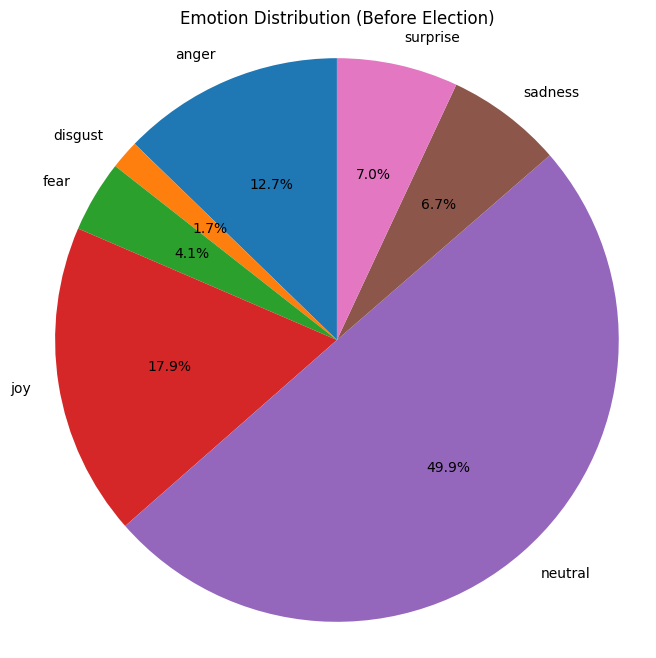

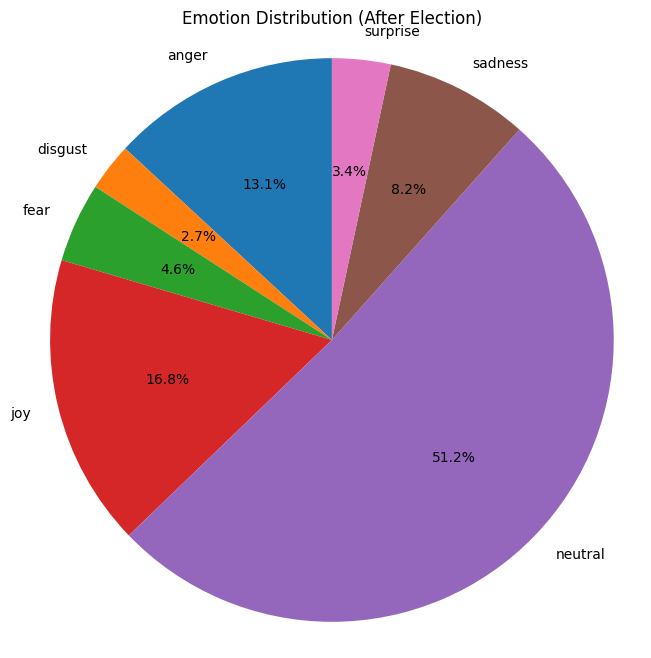

In [ ]:
import matplotlib.pyplot as plt

# Create the pie chart for before election
plt.figure(figsize=(8, 8))
plt.pie(emotion_counts, labels=emotion_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Emotion Distribution (Before Election)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Create the pie chart for after election
plt.figure(figsize=(8, 8))
plt.pie(emotion_countss, labels=emotion_countss.index, autopct='%1.1f%%', startangle=90)
plt.title('Emotion Distribution (After Election)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

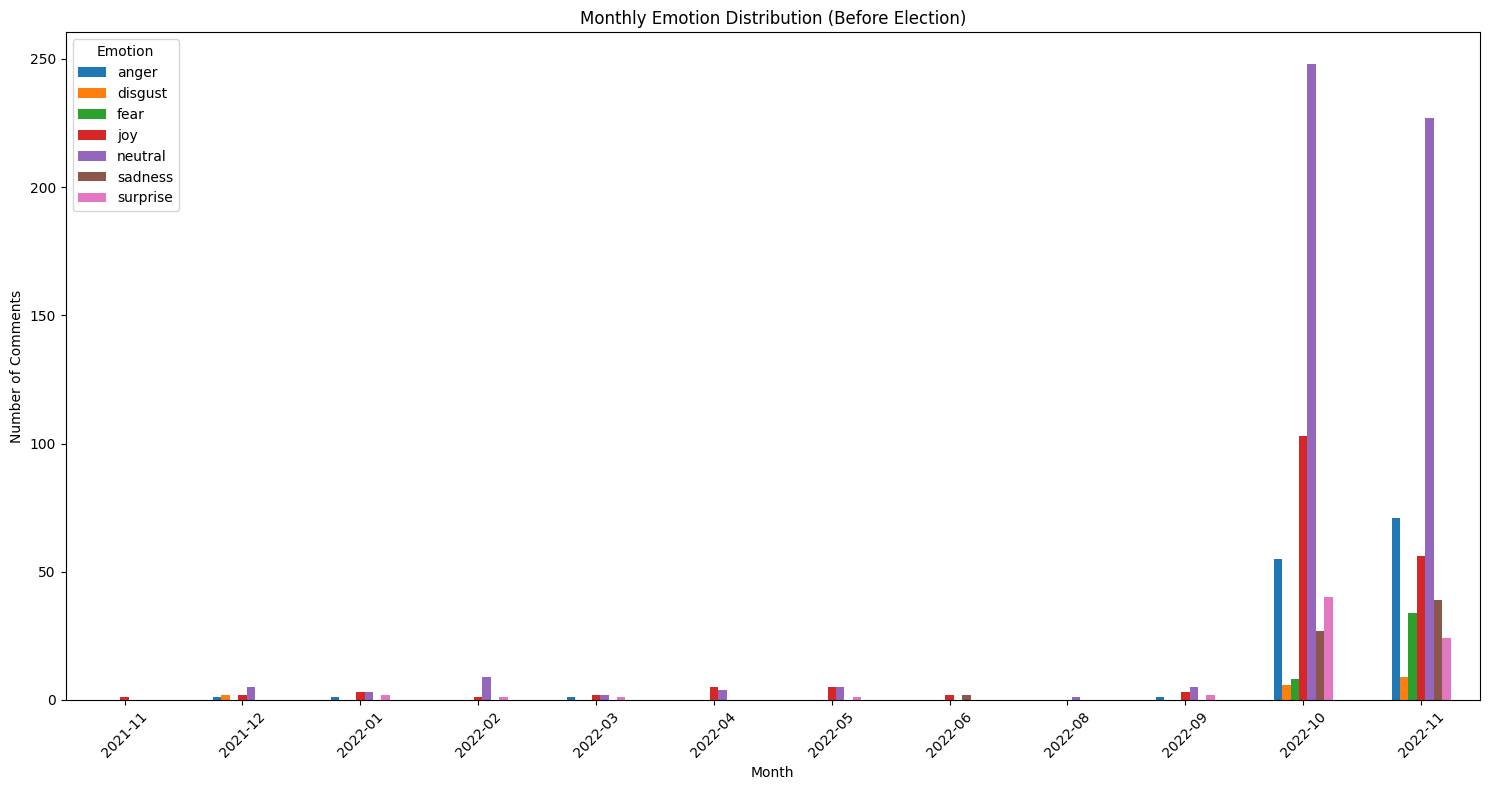

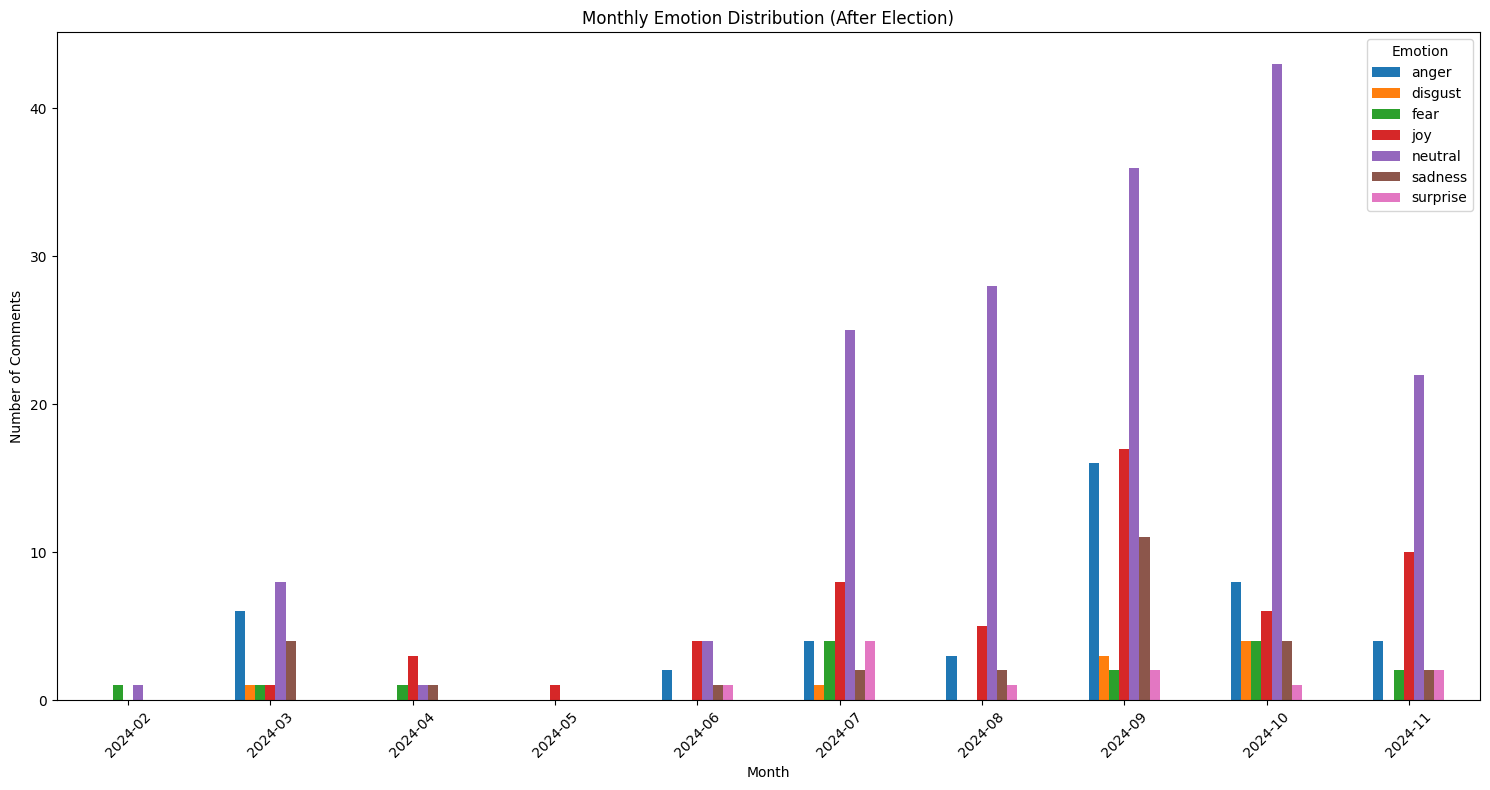

In [ ]:
# prompt: show monthly emotion for before and after election by using published_at feature and detected_emotion feature

import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataframes are already loaded and processed as 'before_election_df' and 'after_election_df'

# Convert 'published_at' to datetime objects
before_election_df['published_at'] = pd.to_datetime(before_election_df['published_at'])
after_election_df['published_at'] = pd.to_datetime(after_election_df['published_at'])

# Extract year and month
before_election_df['year_month'] = before_election_df['published_at'].dt.to_period('M')
after_election_df['year_month'] = after_election_df['published_at'].dt.to_period('M')

# Group by month and emotion, then count
before_emotion_counts = before_election_df.groupby(['year_month', 'detected_emotion']).size().unstack(fill_value=0)
after_emotion_counts = after_election_df.groupby(['year_month', 'detected_emotion']).size().unstack(fill_value=0)


# Plotting
def plot_monthly_emotion(df, title):
    df.plot(kind='bar', figsize=(15, 8))
    plt.title(title)
    plt.xlabel('Month')
    plt.ylabel('Number of Comments')
    plt.xticks(rotation=45)
    plt.legend(title='Emotion')
    plt.tight_layout()
    plt.show()

plot_monthly_emotion(before_emotion_counts, 'Monthly Emotion Distribution (Before Election)')
plot_monthly_emotion(after_emotion_counts, 'Monthly Emotion Distribution (After Election)')

In [ ]:
# Group the DataFrame by the 'sentiment_label' column and count the occurrences of each label.
sentiment_counts = before_election_df.groupby('sentiment_label').size()


# Display the resulting counts
sentiment_counts


,0
sentiment_label,
NEGATIVE,623
POSITIVE,397


In [ ]:
sentiment_countss=after_election_df.groupby('sentiment_label').size()
sentiment_countss

,0
sentiment_label,
NEGATIVE,197
POSITIVE,131


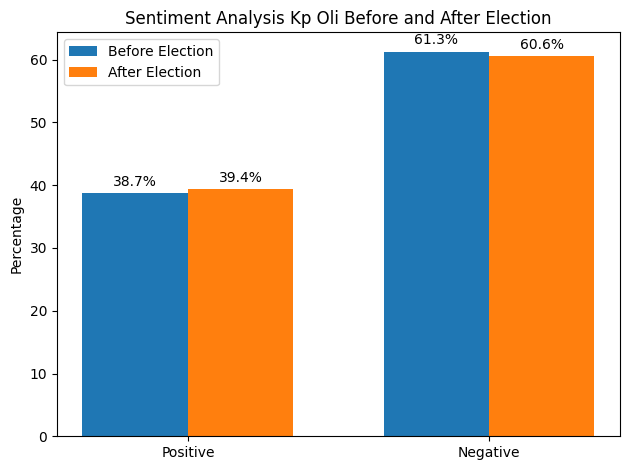

In [ ]:
import matplotlib.pyplot as plt

# Calculate sentiment percentages before and after the election
before_positive = before_election_df[before_election_df['sentiment_label'] == 'POSITIVE'].shape[0]
before_negative = before_election_df[before_election_df['sentiment_label'] == 'NEGATIVE'].shape[0]
before_total = before_election_df.shape[0]

after_positive = after_election_df[after_election_df['sentiment_label'] == 'POSITIVE'].shape[0]
after_negative = after_election_df[after_election_df['sentiment_label'] == 'NEGATIVE'].shape[0]
after_total = after_election_df.shape[0]


before_positive_percent = (before_positive / before_total) * 100 if before_total else 0
before_negative_percent = (before_negative / before_total) * 100 if before_total else 0
after_positive_percent = (after_positive / after_total) * 100 if after_total else 0
after_negative_percent = (after_negative / after_total) * 100 if after_total else 0


# Create the chart
labels = ['Positive', 'Negative']
before_percentages = [before_positive_percent, before_negative_percent]
after_percentages = [after_positive_percent, after_negative_percent]

x = range(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar([i - width/2 for i in x], before_percentages, width, label='Before Election')
rects2 = ax.bar([i + width/2 for i in x], after_percentages, width, label='After Election')

ax.set_ylabel('Percentage')
ax.set_title('Sentiment Analysis Kp Oli Before and After Election')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Add percentage labels above the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()